# Intro to neural network classification with TensorFlow

## Creating data to view and fit

In [6]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [7]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:,0], "X1":X[:,1],"label": y})

In [8]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


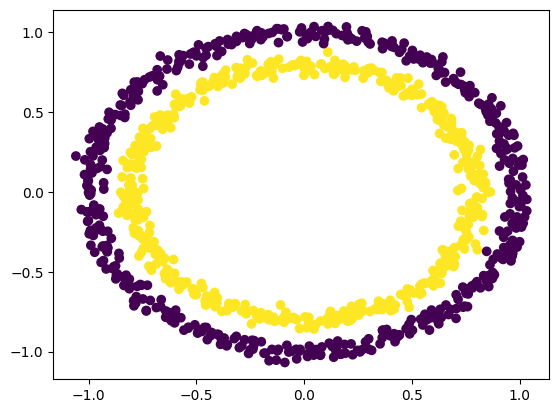

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0],X[:, 1], c=y)

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
X[10], y[10]

(array([-0.64249042, -0.54409929]), 1)

In [12]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

#Steps in modeling

In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim = 2, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.fit(X,y, epochs=100, verbose=0)

In [15]:
import numpy as np

In [16]:
# to visualize our model decision

def plot_decision_boundary(model,X,y):
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, alpha=0.7, cmap=plt.cm.RdYlBu)
  plt.scatter(X[:, 0],X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 0s 845us/step
doing binary classification


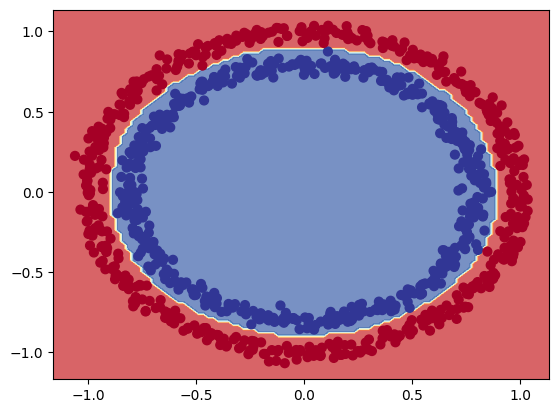

In [17]:
plot_decision_boundary(model,X,y)

In [18]:
toy_tensor = tf.cast(tf.range(-10,10), tf.float32)

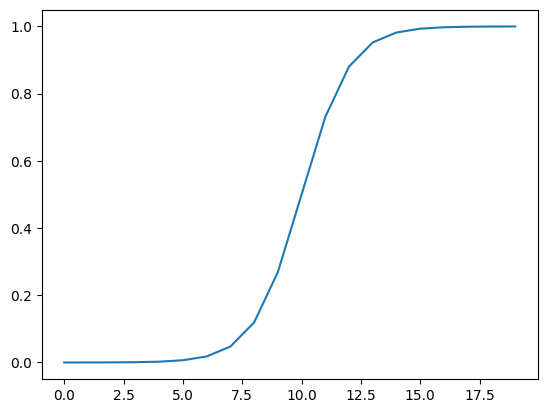

In [19]:
# sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

plt.plot(sigmoid(toy_tensor))

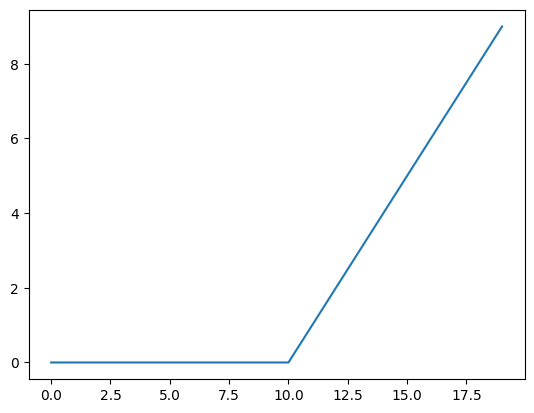

In [20]:
# reLU(x) = max(x,0)

def relu(x):
  return tf.maximum(x,0)

plt.plot(relu(toy_tensor))

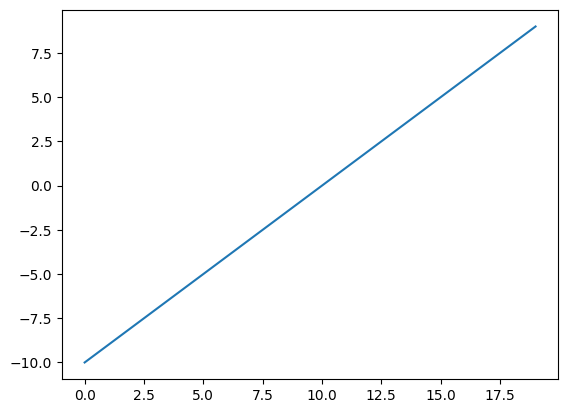

In [21]:
# linear(x) = x

def linear(x):
  return x

plt.plot(linear(toy_tensor))

In [22]:
toy_tensor == tf.keras.activations.linear(toy_tensor)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [23]:
len(X)

1000

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [25]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(32, input_dim = 2, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(8, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['accuracy'])

history_2 = model_2.fit(X_train,y_train, epochs=25, verbose=0)

In [26]:
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000


[0.010031294077634811, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 844us/step
doing binary classification


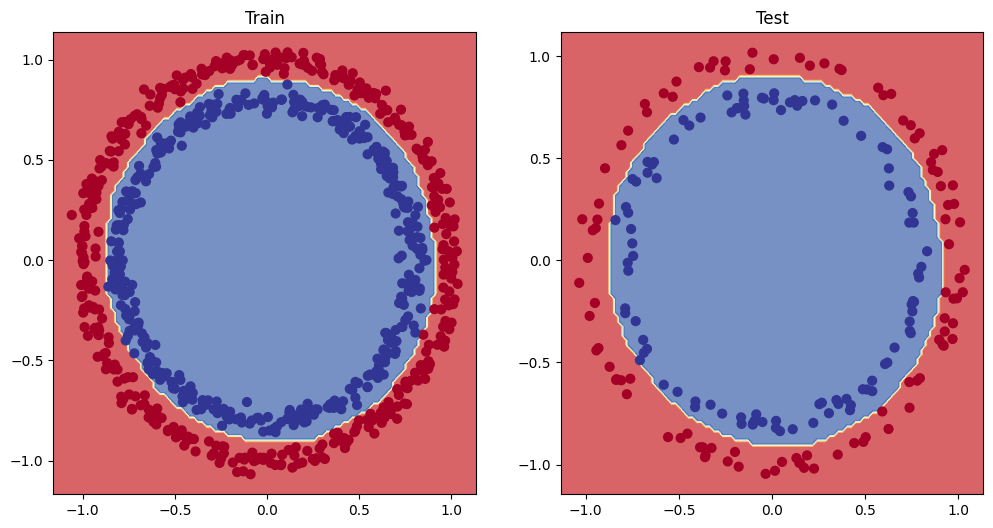

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2,X_train,y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2,X_test,y_test)
plt.show()

## Plot the loss curve and accuracy

Text(0.5, 1.0, 'Model_2 loss curve')

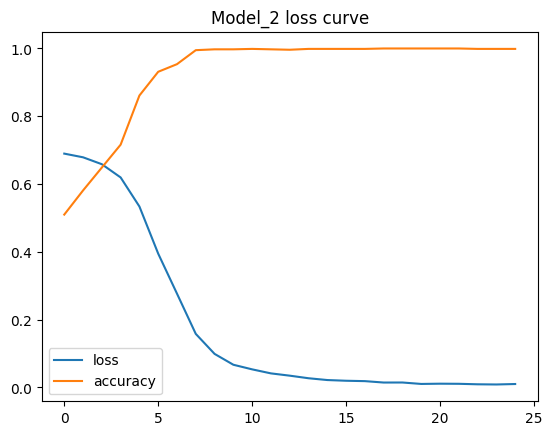

In [28]:
pd.DataFrame(history_2.history).plot()
plt.title("Model_2 loss curve")

## Find the best learning rate

In [29]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(32, activation='relu'))
model_3.add(tf.keras.layers.Dense(8, activation='relu'))
model_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model_3.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

learning_rate = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_3 = model_3.fit(X_train,y_train, epochs = 100, callbacks = [learning_rate], verbose = 0)

<Axes: xlabel='epochs'>

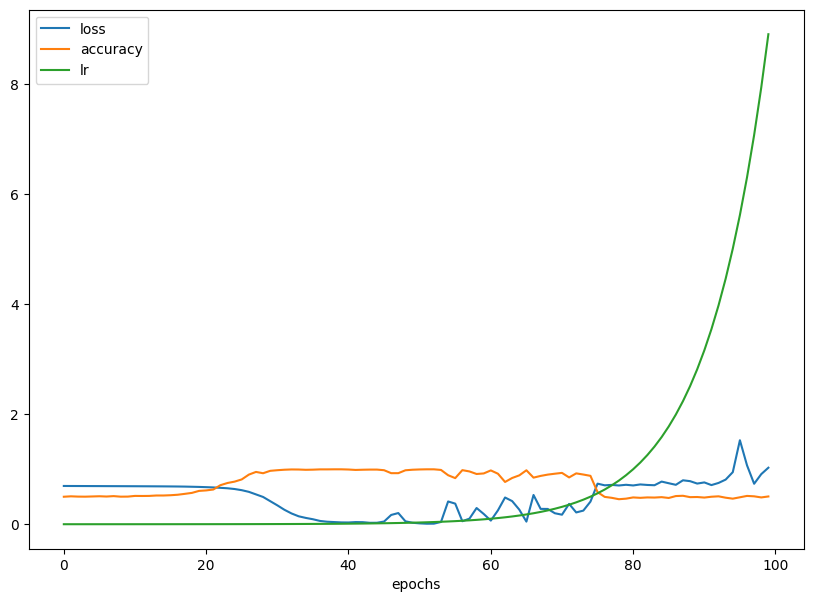

In [30]:
pd.DataFrame(history_3.history).plot(figsize=(10,7), xlabel='epochs')

In [31]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0, 0.5, 'Loss')

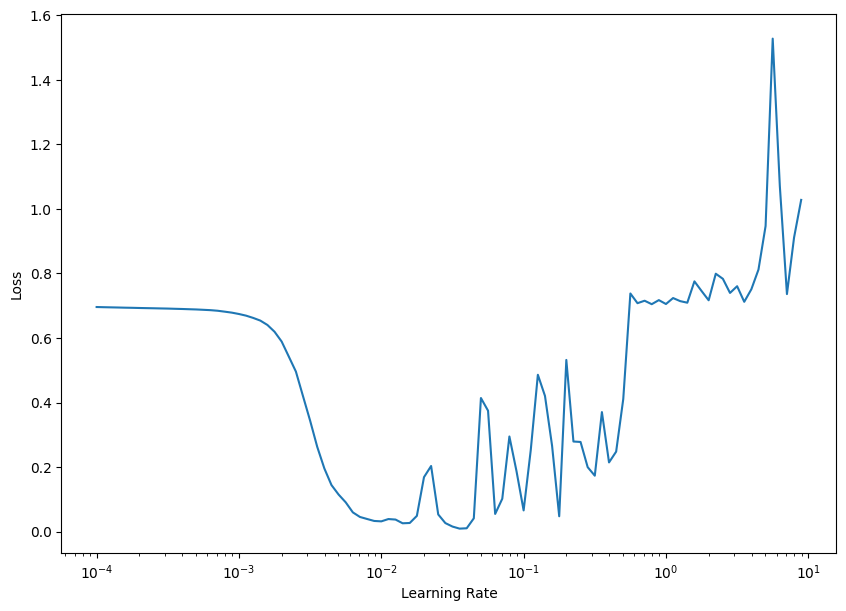

In [32]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_3.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

Looking at this graph it looks like our ideal learning rate is between 1e-3 and 1e-2
Lets take 0.004 as our learning rate

In [33]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(32, activation='relu'))
model_4.add(tf.keras.layers.Dense(8, activation='relu'))
model_4.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.004),
                metrics = ['accuracy'])

history_4 = model_4.fit(X_train,y_train, epochs = 30, verbose = 0)

<Axes: >

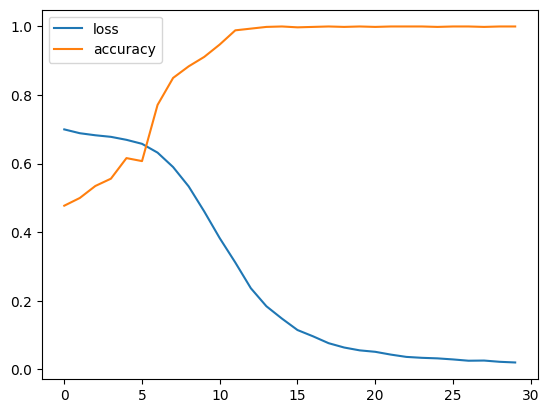

In [34]:
pd.DataFrame(history_4.history).plot()

## More classification evaluation metrics

In [35]:
# Accuracy

In [36]:
# Precision

In [37]:
# Recall

In [38]:
# F1-score

In [39]:
# Confusion matrix

In [41]:
# Classification report

In [42]:
loss, accuracy = model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000


In [47]:
from sklearn.metrics import confusion_matrix

y_pred = model_4.predict(X_test)

confusion_matrix(y_test,y_pred.round())

7/7 [==============================] - 0s 2ms/step


array([[100,   0],
       [  0, 100]])

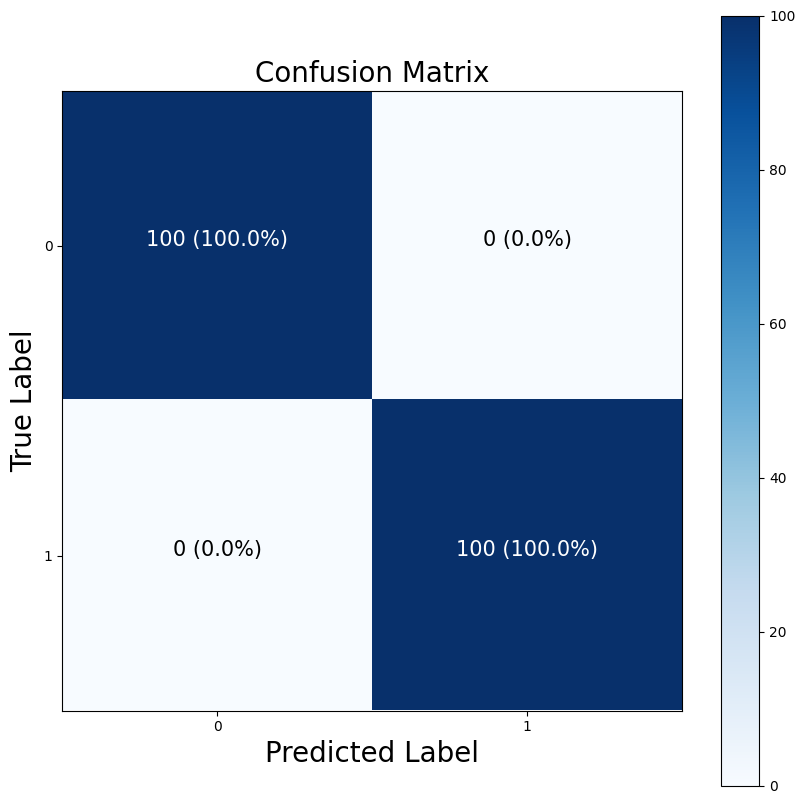

In [59]:
import itertools

figsize = (10,10)

cm = confusion_matrix(y_test,y_pred.round())
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title = 'Confusion Matrix',
       xlabel = 'Predicted Label',
       ylabel = 'True Label',
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i,j] > threshold else 'black',
           size=15)